In [125]:
import pickle
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import os
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
%matplotlib inline
plt.style.use('seaborn')

In [2]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))


In [3]:
true_df.head()

,body,num_source,source,title
0,The following statements were posted to the ve...,2.0,Reuters,"Trump on Twitter (June 6): Mitch McConnell, Jo..."
1,"TEL AVIV (Reuters) - Donald Trump’s attorney, ...",2.0,Reuters,Giuliani says Mueller's investigators trying t...
2,WASHINGTON (Reuters) - U.S. House of Represent...,2.0,Reuters,House Speaker doubtful of NAFTA passage in cur...
3,BRUSSELS (Reuters) - U.S. Defense Secretary Ji...,2.0,Reuters,"In Europe, Mattis is in familiar spot: calming..."
4,"WASHINGTON/MORRISTOWN, N.J. (Reuters) - A lawy...",2.0,Reuters,Lawyer to ex-Trump campaign aide Manafort taps...


In [55]:
stemmer = porter.PorterStemmer()
stopwords = stopwords.words()

In [7]:
def clean_text(text):
    '''Removes stop words and changes word to stem words'''
    cleaned_text = []
    for post in text:
        cleaned_words = []
        for word in post.split():
            low_word = stemmer.stem(word.lower())
            if low_word not in stopwords:
                cleaned_words.append(low_word)
        cleaned_text.append(' '.join(cleaned_words))
        print(round((len(cleaned_text) / 4092) * 100, 2), "%")
    return cleaned_text

In [8]:
def drop_nouns(text_list):
    no_nouns = []
    cleaned_text = []
    phrases = []
    for x in text_list:
        words = pos_tag(word_tokenize(x))
        #werdz2 = (['CC','CD','DT','EX','FW','IN','LS','MD','PDT','POS','PRP','PRP$',
                   #'RP','TO','UH','WDT','WP','WP$','WRB', 'NNP', 'NNPS', 'NN', 'NNS', ',', '.', ':', '(', ')'])
        werdz3 = ['NNP', 'NN', 'NNP', 'NNPs', 'NNS', ',', '.', ':', '(', ')', '#', '``']
        werdz = [s for s in words if s[-1] not in werdz3]
        #print(werdz)
        say_no = ['@','[', ']', 'amp', 'window', 'open','click', 'googletag', 'gpt', 'linkitem', 'googletag', 'getelementbyid',
        'config', 'ldadinit', 'advertis', 'typeof', 'adsdiv', 'fjs', 'js', 'http', 'com', 'awr', 'new', 'function', 'div',
        'ad', 'script', 'typeof', 'nr_is_logged_in', 'undefined', 'adsdiv', 'sharebox_260x60', 'ifr', 'jwplayer', 'jwp',
        'pubdate', 'adunit', 'adwidth', 'www', 'bit.ly/2jpexyr', 'googletag.cmd.push', 'googletag.display', '\'div-gpt-ad-1415299254516-0 \'',
        'open', 'opening', 'opens', 'opened', 'alabama', 'loading', 'email', 'advertise', 'apps', 'closed', 'help', 'publish',
        'rendered', 'undefined', 'adsdiv', 'reloadcount', 'adsdiv.reloadcount', 'window.orignetid', '\'undefined', 'window.origadsplid', 'needsrecovery',
        'io_c3sd.ads', 'elem', 'box', 'box.offsetheight', 'box.style.marginright', 'marginright', 'ad_sharebox_260x60', 'trump',
        'russia', 'fox', 'alerts', 'facebook', 'reuters', 'rsize', 'i+= resize /scr+ipt', 'ipt', 'scr', 'script', 'window.adsetsynccalled',
        'adsetsynccalled', 'recoveryid', 'enablequeue', 'slotrenderended', 'beast', 'daily beast', 'clicking', 'subscribed', 'korea', 'north korea', 'south korea',
        'breitbart', 'epa', 'labelmapping', 'comey', 'scotus', 'republicans', 'cohen', 'iran', 'syria', 'eagles', 'april', 'colorado', 'fbi',
        'haspel', 'wedding', 'puerto', 'rico', 'puerto rico', 'huffpost', 'donald', 'don', 'nra', 'sachs', 'kelly', 'facebook', 'mohammed',
        'div-gpt-ad-1415299254516-0 ', '\'div-gpt-ad-1415299254516-0 \'', '\'slotrenderended \'', 'slotrenderended', 
        '\'.single-post # div-gpt-ad-1415299254516-0 \'', 'slotrenderended', 'ldadinit', 'roseanne', 'israel', 'gaza', 
        'china', 'beijing', 'samantha', 'bee', 'valierie', 'subscribe', 'prelimmonth', 'ivanka', 'documentcloud', 'melania', 
        '(', ')', '-', ',', '.', '!', '"', '\'', 'var', "\'div-gpt-ad-1415299254516-0", 'div-gpt-ad-1415299254516-0', '\'.single-post'
        '\'slotrenderended', 'funct', '.contents', 'googletag.pubads', "\'slotrenderended", "\'.single-post", "'div-gpt-ad-1403197269028-0"
        , 'line-height', '>', 'adtech-adspot', '//', '/style', 'overrid', 'window.adsetplid', 'adid', '||', 'adtech_call_typ',
        'by_request', 'adtech_call_typ', 'iframe_proxy', 'ifr.offsetwidth', "ifr.offsetheight", "'jquery", "'readytorecover",
        'args', "waitforglobal", 'arg', "elem.contains", "'reloadad", 'els', "'adtech", 'refreshr', "'none", 'collapsed', 
        'fc', 'f', 'ajax', 'needsrecoveri', 'i+=', '&', '<', '=', 'http', 'https', "'http", "'http", "'script", 'twitter', 
        '/.test', "'https", 'newsletter-inline-widget', 'margin-bottom', '15px', 'font-weight', 'font-size', '12pt', 'div.mc-field-group',
        'padding-bottom', 'padding-right', 'input.mc-input', '.newsletter-inline-widget', 'font-family', '.wpcf7-form-control.wpcf7-text',
        '7e7e7e', 'arial', '.wpcf7', '.wpcf7-form-control.wpcf7-text', '.newsletter.widget__contain', '.wpcf7-form-control.wpcf7-submit',
        'box-shadow', 'text-shadow', 'letter-spacing', '.newsletter.widget__wrap', '.newsletter.widget__head', 'text-transform', 
        'max-width', 'td.first', 'padding-left', 'border-radius', 'hr.divid', 'p.subtext','==typeof', '.gettime', 'window.outerwidth',
        'rcel.async', '/**', 'url', "'data-timestamp", '+new', 'd.head', 'javascript', 'php_widget-140', 'php_widget-104', '.today-on-the-show-cont',
        '.alignleft', 'margin-right', 'margin-top', '.alignright', "'/wp-content/uploads/static/tots.html", "'.today-on-the-show-content",
        "'.today-on-the-show-cont", '.html', 'img.hero-ad-speci', 'fa', 'fa-chevron-down', 'usercollapsetext', 'newsletter-side-widget', 
        'ul.stansberry-form', 'text-align', 'margin-left:0', 'margin-bottom:5px', 'border-top', '-webkit-border-radius', '-khtml-border-radius',
        'border-width', 'border-style', 'border-right', 'padding-left:8px', '.textsiz', 'margin-top:5px', 'ul.links_list', 'img.breaking_imag', 
        'adtech_sharebox_260x60', 'advertisement', '===', 'kraken__adblock.active', 'i=0', 'id=', 'style=', '//www.documentcloud.org/documents/4434037-hhrg-115-if00-wstate-zuckerbergm-20180411.js', 
        '//assets.documentcloud.org/documents/4434037/hhrg-115-if00-wstate-zuckerbergm-20180411.pdf', 'br', 'lt', '//assets.documentcloud.org/documents/4434037/hhrg-115-if00-wstate-zuckerbergm-20180411.txt',
        '//www.documentcloud.org/documents/4425618-van-der-zwaan.js', '//assets.documentcloud.org/documents/4425618/van-der-zwaan.pdf', '//assets.documentcloud.org/documents/4425618/van-der-zwaan.txt',
        'subscrib', 'window.datawrapper', '.embeddeltas', 'datawrapper-height', '=typeof', '==', 'div-gpt-ad-inline_1_mobile', '.jw-player-contain', "'jwp",
        '.playlist', 'episode.title', 'ns_st_st=\\', 'ns_st_pu=\\', 'ns_st_pr=\\', 'ns_st_ep=\\', 'ns_st_ia=\\', 'div-gpt-ad-native_mobile', 'div-gpt-ad-inline_2_mobile',
        'div-gpt-ad-inline_3_mobile', 'ns_st_sn=\\', 'ns_st_en=\\', 'ns_st_ge=\\', 'ns_st_ce=\\', 'ns_st_ddt=\\', 'ns_st_tdt=\\', 'div-gpt-ad-native', 'div-gpt-ad-inline_4_mobile',
        '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/slideshow\\/596990', '\\u0000*\\u0000links', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/media', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/categories',
        '\\/\\/api.w.org\\/term', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/tags', '\\/\\/www.nationalreview.com\\/photos\\/prince-harry-meghan-markle-royal-wedding\\/', '2fwww.nationalreview.com', 'text=harri', '2fprince-harry-meghan-markle-royal-wedding',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-26.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-8.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-37.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-110.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-111.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-45.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-38.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-44.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-7.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-12.jpg', 
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-11.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-43.jpg', 
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-21.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-18.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-22.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-116.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-42.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-14.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-39.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-54.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-112.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-106.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-25.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-46.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-24.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-29.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-48.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-107.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-47.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-33.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-51.jpg', 'google_ad_cli', 
        'adunit.style.display', '.length', 'google_ad_width', 'google_ad_height', 'adunit.style.margin', 'adunit.style.textalign', 'adunit.classnam',
        '//www.activistpost.com/2018/06/israeli-selling-surveillance-systems-governments-around-world.html', "'theactivistpost", '.innerhtml', 'ld-ajs', 'w.ldadinit=w.ldadinit||', '//www.activistpost.com/2018/06/google-quits-drone-program-u-s-navy-wants-drone-motherships-with-help-of-a-i.html',
        '302px', '422px', '300px', '0px', '12px', '60px', '25px', '250px', '3px', '40px', '1px', '10px','titl', '0\\', '//www.activistpost.com/2018/04/us-bombs-syria-to-cover-up-lack-of-evidence-on-chem-attacks-discredits-own-claims-by-doing-so.html', 
        '//www.activistpost.com/2018/05/red-nose-day-recognizes-kids-living-in-poverty-article-the-rich-get-smart-the-poor-get-technology-the-new-digital-divide-in-school-choice-highlights-part-of-the-problem.html', 
        'firstscript', 'dsqlocal', "'trackback_url", 'disqus_shortnam', 'fb-extra-h2', 'prelimd', 'resize', 'scr+ipt', 'paul', 'watson']
        regex = re.compile(r"\S+www.nationalreview.com\S+")
        linkstr = re.findall(regex, str(werdz))
        say_no.append(linkstr)
        #regex2 = re.compile(r"\\\S+")
        #linkstr2 = re.findall(regex2, str(werdz))
        #say_no.append(linkstr2)

        werdz = ([s[-2] for s in werdz if s[-2] not in say_no and 'wp.com' not in s[-2] and 'facebook.com' not in s[-2] and
                 '1897954795849722' not in s[-2] and '999999' not in s[-2] and "'100" not in s[-2] and 'prelimmonth' not in s[-2]
                 and '5g' not in s[-2] and 'scr+ipt' not in s[-2] and 'documentcloud.org' not in s[-2] and 'www.' not in s[-2]
                 and '10 10' not in s[-2] and 'labelmap' not in s[-2] and 'finald' not in s[-2] and '23390304' not in s[-2]
                 and 'box.' not in s[-2] and 'label.' not in s[-2] and '.style' not in s[-2] and '10 100' not in s[-2]])
        
        #check cleaned text line from function above
        no_nouns.append(' '.join(werdz))
        print(round((len(no_nouns) / 4092) * 100, 2), "%")
        #no_nouns.append(werdz)
    return no_nouns

In [9]:
cleaned_text = clean_text(true_df.body)

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.04 %
0.04 %
0.04 

0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 

0.58 %
0.58 %
0.58 %
0.58 %
0.58 %
0.58 %
0.58 %
0.58 %
0.58 %
0.58 %
0.58 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 

0.87 %
0.87 %
0.87 %
0.87 %
0.87 %
0.87 %
0.87 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 

In [10]:
how_can_this_happen = drop_nouns(cleaned_text)

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.01 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.02 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.03 %
0.04 %
0.04 %
0.04 

0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.29 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.3 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.31 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.32 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 %
0.33 

0.58 %
0.58 %
0.58 %
0.58 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.59 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.6 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.61 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 %
0.62 

0.87 %
0.87 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.88 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.89 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.9 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 %
0.91 

In [52]:
'''tfidf = pickle.load(open("pickle_files/tfidf.pkl", "rb" ))'''

'tfidf = pickle.load(open("pickle_files/tfidf.pkl", "rb" ))'

In [53]:
'''cor_tfidf = tfidf.transform(how_can_this_happen)'''

'cor_tfidf = tfidf.transform(how_can_this_happen)'

In [54]:
'''corpus_lsa = pickle.load(open("pickle_files/corpus_lsa.pkl", "rb" ))'''

'corpus_lsa = pickle.load(open("pickle_files/corpus_lsa.pkl", "rb" ))'

In [55]:
'''%%time
lsa = pickle.load(open("pickle_files/lsa.pkl", "rb" ))'''

'%%time\nlsa = pickle.load(open("pickle_files/lsa.pkl", "rb" ))'

In [11]:
tfidf = pickle.load(open("pickle_files/tfidf.pkl", "rb" ))
cor_tfidf = pickle.load(open("pickle_files/cor_tfidf.pkl", "rb" ))


In [12]:
lsa = pickle.load(open("pickle_files/lsa.pkl", "rb" ))
corpus_lsa = pickle.load(open("pickle_files/corpus_lsa.pkl", "rb" ))

In [13]:
lsa.predict("""BY JONATHON DORNBUSH Some of the best films of all time are those whose different strengths all work in concert to create a unified, engrossing whole. The Shining, The Social Network, and Jaws are all excellent examples of films made up of strong individual parts complementing each other to form a fantastic work of art. That is absolutely true of God of War – its musical score elevates story moments, which flow seamlessly into fantastic action gameplay, which facilitates exploration and puzzles that reward you with a deeper understanding of its characters and its expansive and beautiful world. God of War is a masterful composition of exceptional interlocking parts, deliberate in its design and its foreshadowing, which pays off in unexpected ways in both the gameplay and story.

Set in a new, Norse mythology-inspired world and starring a familiar but thoughtfully reimagined character, God of War’s fish-out-of-Greek-water tale is a nonstop whirlwind of emotions. It’s all framed by one continuous camera shot that never cuts away or takes the focus off of the heart of it all: Kratos’ relationship with his young son, Atreus. But the story also encompasses an indelible supporting cast, a gorgeous world consistently rewarding to explore, and immensely satisfying combat.

“
God of War works from minute one thanks to the simplicity of its plot.

God of War works from minute one thanks to the simplicity of its plot. Kratos and Atreus – who start as, at best, acquaintances – begin their journey having just gone through the loss of Kratos’ wife, whom Atreus bonded with much more than his father. The two set out to the tallest point in all the realms to carry out her final wishes.

The setup is Journey-like in its visual nature – I saw the peak in the distance and knew I’d get there eventually – but as similar stories have taught me, the path is never a straight or easy one. A number of obstacles, both natural and god-made, extend the adventure to around 25 hours’ worth of terrifying threats, beginning with the first major encounter in the opening hours.

If you’ve played the previous games in the series – seven of them, counting two PSP games and one mobile game – you know that Kratos lived a long life of loss, triumph, and plenty of god-killing in ancient Greece. While that history certainly informs who he is now, the character we encounter here has started a new chapter, having found love, a family, and a full bushy beard in this world of Norse mythology. But he is still a stranger to this place, and is forced to rely on the son he barely connects with to decipher its languages and guide him when the swing of an axe or the imprint of his boot on an undead foe won’t do the trick.

That relationship, and how it evolves and changes over the course of the story, is one of God of War’s most captivating qualities. Here are two people with demonstrably different personalities, one of them young and still innocent, the other old and as blood-soaked as they come, both grieving over the same woman in different ways. Kratos loves his son but is cold at first. He seems disappointed in his lack of skill and stomach for combat, referring to him mostly as “Boy,” and rarely making eye or physical contact with him. (He will, of course, unflinchingly beat the life out of anyone who threatens his son, which appears to be the only way he knows how to express affection.) Kratos’ uncertainty of how to relate to a boy he’s both looking to turn into a survivor and yet afraid may turn out like him is devastating to watch.

“
Sharp dialogue made me see myself in both Kratos and Atreus' shoes.

Their dichotomy plays out in stirring, realistic moments throughout the story. I was surprised by how often I saw myself in both Kratos and Atreus’ well-worn shoes. I’ve told important people in my own life some of the very things they say to each other, and I’ve thought (but been too afraid to speak aloud) many others, making God of War’s relationships feel real and cuttingly honest. Other games have tackled parent-child relationships, but I can’t remember a father-son dynamic so successfully developed and used to ground a fantastical adventure.

This depth and complexity is something entirely new to Kratos, and this new God of War transforms him from the previous games’ flat embodiment of the bloodthirsty warrior cliche into someone who can stand shoulder to shoulder with some of my favorite protagonists in recent media. He’s now voiced by Stargate SG-1’s thunderous baritone Christopher Judge, who can say so much with a single word or grunt. He gives the long-running character’s stoic dialogue both an intimidating gravitas and nuance you can hear as he grapples with the needs of his son, his internal fears and pain and, of course, the elements and monsters trying to stop him from reaching his goal.

You’re Still Young, That’s Your Fault
God of War’s single-camera shot style that, unless you die, never cuts once from title screen to ending credits – is a subtle effect that didn’t really strike me at first. But as I explored and fought my way through the story, it served to highlight the power of some of the larger-scale monsters. By never leaving Kratos’ side, I maintained the perspective needed to instantly convey the intensity of taking on a foe 10 times his size. And fear not, God of War still delivers the franchise’s trademark variety of awe-inspiring locations, and the camera helps them shine through in the story’s quietest moments.

At some of the most tense and heartbreaking moments, the camera never leaves Kratos’ mindstate. You’re forced to sit with him – sometimes in silence, sometimes in anguish as a haunting choir echoes around him, and sometimes in relief – through every second of it. That intimacy makes those emotions all the more real and impactful. It’s made Kratos relatable enough that I’ve been caught audibly referring to Atreus as “my son” several times since the opening hours.

Atreus’ impact cannot be understated – he’s both an asset to the story and in battle. That’s a huge relief because, historically, games that force you to stick with a sidekick of sorts for the entire experience have been hit or miss. Some, like The Last of Us, use that relationship to smart effect, with twists to the gameplay introduced late in the story. Others make those sidekicks a constant hassle – an extra life bar governed by a sometimes-suicidal AI to consistently worry about in the midst of battle. Atreus is more like the former.

What’s so smart about this central relationship, though, is how brilliantly God of War mirrors it onto gameplay from the start. Though the two were estranged, Atreus is still Kratos’ son, and so he listens to your directions and behaves as an almost invulnerable extension of your own abilities in combat. Equipped with a bow and a bottomless quiver of arrows, Atreus will automatically plink away at enemies or jump on them to stun them, and he’ll take a more powerful shot at whatever you’re looking at when directed with a tap of the square button, creating a rhythm as you time taps to match his recharge rate and employ his attacks effectively. His skill tree can also be upgraded to follow up on Kratos’ more powerful attacks. Yet God of War plays with the assumption that Atreus is always at your beck and call, and the weight of the changes in their relationship are cleverly woven into your battles.

The Art of War
And there are battles aplenty. Though Kratos only kills for survival now, he still does so with a flair for brutality. The stun-kill animations can be especially gory and literally bone-crunching affairs. (Though, because there’s only one per enemy type, they become somewhat repetitive to watch.) While God of War is altogether more emotionally complex and layered, its excellent combat undoubtedly carries forward the blood-soaked traditions of the series.

Kratos’ signature weapon this time out is the Leviathan Axe, which is one of the best weapons I’ve used in any recent game. It begins with a simple light and heavy attack but can be upgraded and given new abilities throughout your journey. It’s a lot of fun to chop and slice through hordes of foes with, but I’ve rarely enjoyed a weapon more than when the axe is flying through the air.

“
The Leviathan Axe acts just like Thor's hammer, and it's So. Damn. Satisfying.

Its best trick is that, when thrown, the Leviathan acts just like Thor’s hammer, Mjlonir, as depicted in the Marvel movies. The axe will whip back into your hand with the tap of the triangle button, cutting any foes in its path, both coming and going. It’s also imbued with a frost power that can freeze individual targets while it’s lodged in them, letting you disable one while you beat on his friends with Kratos’ almost-as-lethal fists.

The feel of throwing and recalling the Leviathan Axe is So. Damn. Satisfying. The first time I learned I could do this, I sliced an enemy through the head and then proceeded to spend a good 10 minutes just chucking the axe and recalling it in the forest, noting and appreciating the slight difference in the time it takes to return from greater distances. The loud, reverberating thwang noise it makes, paired with a precise rumble in the controller, makes the return slam into Kratos’ outstretched hand feel good even hundreds or thousands of throws later.

Finding the right combination of slicing, throwing, assistance from Atreus, and parrying with Kratos’ retractable shield turns each battle into a bloody ballet of timing – and that’s before you begin unlocking special attacks, like a beam of ice shooting out from the axe or a Patronus-esque wolf Atreus can summon for battle. Though I quickly found my favorites, certain scenarios required me to vary up my abilities by mixing in enemies with immunities and weaknesses. I skipped out on some options in the early game, because options are limited by what you can afford to unlock with XP, but by the latter half I had more than enough to unlock pretty much everything I wanted in time for the most brutal battles. I felt encouraged to experiment.By the end, I’d maxed out every skill tree, including Kratos’ returning Rage of the Gods ability that gives you a temporary boost to damage via a flurry of flaming fists. But those upgrades didn’t make battles a breeze – I still found challenge until the very end, and beyond in my post-game endeavors.

A big variable in combat is Kratos and Atreus’ armor. Chest, wrist, and waist pieces, as well as some tweaks to the axe, can alter a number of Kratos’ stats, from strength and defense to runic magic and attack cooldown rates, and those can have a significant effect on the way you fight. I stayed with my tried-and-true animal hide chest guards rather than full breastplates, sacrificing defense over strength, but would take on new equipment – or outfit them with my amassed slottable runes – to imbue my gear with defenses against certain enemies or to accentuate abilities like my axe’s frost power. I also may have made a few clothing choices based on look because, even though Kratos is no fashion icon, with such intricate character detail I wanted him to stay true to my vision of this embattled man. (And, largely, my Kratos would never wear bulky chest plates.)

To the very end, I approached every battle with determination, adapting my fighting and fashion to the variety of enemies, which range from Kratos-sized to sometimes 10 times bigger. I encountered an ice enemy early on against whom my axe did no damage, forcing me to rely on my fists and Atreus’ bow. And the gruesome revenant witch enemy required me to focus on stunning first, as they moved far too quickly for most of my axe hits to connect. That enemy diversity always made me feel like I was learning, up to and including my exploration of some of the optional areas. It seemed as though every time I worried enemy variety might be about to stagnate, a new type or variant would pop up to further complicate my journey.

The big enemies put up a great fight, like a giant troll who swats at you with a huge club, but some of the best that come from human-sized foes offer a worthy challenge. Most notably, there are a couple of stellar boss fights that, while not terribly complex, do a fantastic job of showing off Kratos’ god-level strength and conveying a feeling of power.

A Whole New World
God of War’s initially linear world opens up a bit after the first few hours, and it encourages exploration through its many rewards and collectibles for completing optional puzzles and fights. But you can occasionally stumble into the path of a much more difficult opponent, clearly denoted by the purple color of their health bar, and they can often take you down in one or two hits. Running into these situations occasionally felt like intruding on someone or something else’s territory, and I needed to be prepared. If I felt hungry for a challenge, God of War never let me down.

There’s plenty of freedom, although the map never becomes truly “open world” in the way that games like The Legend of Zelda: Breath of the Wild or Horizon Zero Dawn are; instead, it’s an interconnected series of diverse locations, many of which are gated behind certain story moments and collectible milestones until the very end. God of War’s contained nature shepherds you through certain locations with its quest chain, which occasionally leans on the cliche of a solution Kratos thought would work turning out to be missing one key component you then need to then go scour the land for. But its world unfolds through smart integration with that story in a manner that occasionally transformed me into a cliche, too. I expected Kratos’ journey to be relatively straightforward and somewhat contained to the area I was initially presented. But then you might stumble on a collectible that extends Kratos’ journey far beyond expectations. Those moments – where I’d find myself traveling further than I set out to and in a surprisingly expansive world, no less – had me literally leaping out of my chair.

Some of that progress requires straying from the main path, as there are also several major, rewarding areas you can miss entirely if you don’t take advantage of Atreus’ many reminders that you can explore newly uncovered terrain. Both the optional areas and those key to the story not only make smart use of Norse figures and locations, but some are also reshaped throughout the story in ways that make repeat visits valuable and exciting. A variety of collectibles are scattered throughout the world that can earn you tangible rewards, like resources for crafting new armor or new special attacks, or simply offer new tidbits of Norse myth.

“
Knowledge of the lore is its own reward in God of War.

Knowledge of that lore is its own reward in God of War, and I loved hunting down every story thread about the mythology I could find. It helps that these discoveries are often stashed near a beautiful vista or deep in a palpably dank cavern. The fascinating juxtaposition is that Kratos is living through some of the very Norse myths I’ve read about, and so I wanted to explore not just so I could learn the tale of Fafnir the Dwarf but to better understand Kratos’ story.

Even after the story ended, I sunk at least another 10 to 15 hours (so far) into exploring the world. By all indications, I still have a bit left to find, and I want to uncover every inch of it. Quite often when I’m not playing God of War, I’m thinking about caves left unexplored or the tougher foes left unbeaten. Clever environmental puzzles and collectibles have me returning to places I’ve already been many times over in search of new crevices and corners.

That’s largely due to how vast and intriguing the world developer Sony Santa Monica Studio built is, but it’s also because of how gorgeous every environment looks. Even during the 10 or so hours I played on a launch PlayStation 4, I marveled at the scenery – how lush the tree lines looked, or how pretty a snowy mountainside looked in the distance. And then I played God of War on a PS4 Pro and was blown away by the true level of detail the world holds when bumped up to (checkerboard) 4K.

The Beauty’s in the Details
I have audibly said “wow” and sighed at the beauty of God of War. The texture of grassy hills in the distance feel real, light dances dazzlingly off of shinier surfaces, and every gnarled monster I have fought conveys such a sense of decay as to instill terror in me. Even the sky looks nearly photo-realistic. And while the beautiful landscapes captivated me, the small details on Kratos and Atreus stunned me. The fur and leather of their outfits move so naturally, and are so finely detailed that they look nearly genuine. I would find myself trying on new pieces of armor just to admire how Kratos’ outfits behaved.

All of this beauty comes at a cost, however, and that means God of War runs at or around 30 frames per second instead of the 60 frames that makes action games feel so much smoother. That said, the world and its inhabitants largely ran well for me, outside of the occasional framerate dip when swinging the camera over complex scenery or around in the midst of a cramped battle, or while in the “Favor Resolution” Pro mode, which maintains the higher resolution at the expense of dropping some frames here and there. The "Favor Performance" mode visibly ups the framerate, but not to 60 fps in my time with it. But the occasional issues in my playthrough never hindered my progress or noticeably took me out of the experience on either the regular PS4 or the PS4 Pro.

Outside of seeing Kratos’ pores in more detail than you might have expected, that higher fidelity also impacts the performances of Judge as Kratos and Sunny Suljic as Atreus because it allows them to convey so much with their faces. The subtle movements of Kratos’ brow, or the changes in Atreus’ walk when he’s feeling down are so lifelike that I found myself lost again and again in their pains and joys.

“
It features easily one of my favorite supporting characters in years.

The two lead actors are elevated by a wonderful supporting cast. A pair of friendly dwarves initially seem like mere comic relief but grow to be integral parts of Kratos and Atreus’ story, with fascinating tales of their own. And the mid-game addition of one key character adds an engaging, hilarious, and heartwarming dynamic to the core duo, transforming this character into easily one of my favorite supporting characters in a game in years.

The main villains and many of the supporting characters are complex in their motivations, too. Kratos’ (and, by extension, my own) relationship to them transformed in fascinating ways over the course of the adventure. Characters I supposed were merely added for comedic relief turned out to be much more complex, and God of War twists character allegiances and motivations in emotionally relevant ways. And yes, some of those foes are gods, but God of War picks intriguing members of the Norse pantheon, which means we get to see stories of characters other than the popular Thor, Loki, and Odin. While I would have liked to see a few more scenes featuring the main antagonist, the moments involving the big bad are not only captivating but intriguingly mirror the story of Kratos and Atreus, giving nearly every moment deeper meaning.

“
God of War's story revolutionizes a one-note character.

Much of what spurs on Kratos and his friends and enemies is the one true motivator behind most deities in ancient mythologies: family. There’s an incredible and clear level of forethought to not only sustaining and expounding on that theme but to making sure the plot, gameplay, and exploration setups early on continue to pay off in new and exciting ways around every corner. I was continually impressed with how consistently something referenced early on in God of War would come full circle later on, perhaps only then to be revealed as the setup for another payoff. Replaying the first few hours, I was astonished at the cleverness of the foreshadowing. And even though I had only just finished the story, I felt the itch to keep playing on this new save.

God of War has so much to offer, and you’ll notice I’ve tried to remain as vague as possible in telling you about all of it. That’s not because God of War hinges its whole structure on a twist, or a gameplay trick you’ll never see coming – it doesn’t. But what it does offer is a vibrant, fascinating world packed to the brim with secrets I’m still uncovering, centered around a tale that revolutionizes a one-note character. That sense of discovery is rare, and one that should be experienced firsthand.

The Verdict
I expected great action from God of War, and it delivers that handily. But I didn’t expect it to be a thrilling journey in which every aspect of it complements the others to form what is nothing short of a masterpiece. It’s a game in which Kratos, a previously one-note character, becomes a complex father, warrior, and monster, embattled both on the field and within his own heart about how to treat his son; one in which the world opens up and shifts, offering rewards in both gameplay and knowledge of its lore that I treasured with each accomplishment. The obvious care that went into crafting its world, characters, and gameplay delivers by far the most stirring and memorable game in the series.""")

AttributeError: 'TruncatedSVD' object has no attribute 'predict'

In [14]:
km = pickle.load(open("pickle_files/km.pkl", "rb" ))

In [15]:
true_df_clusts = pickle.load(open("pickle_files/true_df_clusts.pkl", "rb" ))

In [17]:
true_df_clusts

,body,num_source,source,title,clusters
0,The following statements were posted to the ve...,2.0,Reuters,"Trump on Twitter (June 6): Mitch McConnell, Jo...",26
1,"TEL AVIV (Reuters) - Donald Trump’s attorney, ...",2.0,Reuters,Giuliani says Mueller's investigators trying t...,19
2,WASHINGTON (Reuters) - U.S. House of Represent...,2.0,Reuters,House Speaker doubtful of NAFTA passage in cur...,34
3,BRUSSELS (Reuters) - U.S. Defense Secretary Ji...,2.0,Reuters,"In Europe, Mattis is in familiar spot: calming...",55
4,"WASHINGTON/MORRISTOWN, N.J. (Reuters) - A lawy...",2.0,Reuters,Lawyer to ex-Trump campaign aide Manafort taps...,69
5,"WASHINGTON (Reuters) - Mick Mulvaney, the inte...",2.0,Reuters,Trump's consumer financial chief disbands key ...,2
6,WASHINGTON (Reuters) - Facebook Inc (FB.O) sai...,2.0,Reuters,Facebook confirms data sharing with Chinese co...,94
9,WASHINGTON (Reuters) - U.S. President Donald T...,2.0,Reuters,"Trump to have meetings with France's Macron, C...",34
10,"SACRAMENTO, Calif./PRINCETON, N.J. (Reuters) -...",2.0,Reuters,Democratic hopes for House control buoyed by v...,37
12,"SACRAMENTO, Calif./PRINCETON, N.J. (Reuters) -...",2.0,Reuters,Democrats beat vote quirk to challenge Republi...,37


In [19]:
true_df_clusts.clusters.value_counts()

27     129
109    116
10     111
104     85
62      77
7       73
30      72
9       69
16      64
37      63
127     63
33      62
23      59
101     53
118     53
2       50
38      50
111     49
96      48
128     48
29      45
74      45
19      44
132     43
93      41
117     41
53      40
81      40
35      40
94      38
      ... 
49      15
44      14
83      14
138     14
68      14
24      13
120     13
84      13
85      12
112     12
59      12
88      11
131     11
121     11
66      11
126     11
110     11
90      10
71      10
134     10
108      9
18       8
61       7
133      6
78       6
130      5
91       5
119      4
40       2
4        1
Name: clusters, Length: 140, dtype: int64

In [20]:
dt = pickle.load(open("pickle_files/dt.pkl", "rb" ))


In [66]:
os.system('say "Your move.....Commander"')

0

In [22]:
X = true_df_clusts.clusters
y = true_df_clusts.source
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [23]:
dt = DecisionTreeClassifier(max_depth=25)
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
print(dt.score(X_train, y_train))

0.5738705738705738
0.6208371524595173


In [28]:
knn = KNeighborsClassifier(n_jobs= -1, n_neighbors=15)
knn.fit(X_train, y_train) 
## And score it on your testing data.
knn.score(X_test, y_test)

0.5628815628815629

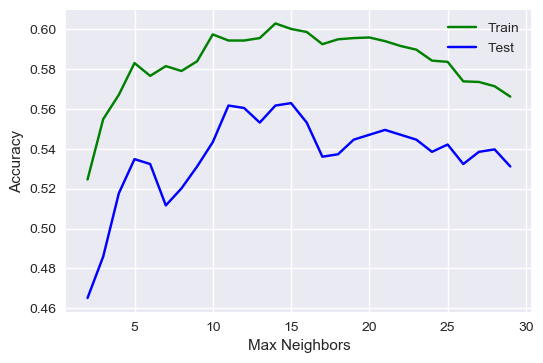

In [27]:
train_score = []
test_score = []

for neighbors in range(2, 30):
    knn = KNeighborsClassifier(n_jobs= -1, n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(2, 30), train_score, 'g', label="Train")
plt.plot(range(2, 30), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Neighbors")
plt.ylabel("Accuracy");

In [128]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)
#print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

                 precision    recall  f1-score   support

  Activist Post       0.86      0.97      0.91        64
  Alabama Today       0.99      0.92      0.95        79
Associate Press       0.00      0.00      0.00         9
      Breitbart       0.54      0.25      0.34        84
    Daily Beast       0.83      0.55      0.66        69
       Fox News       1.00      0.92      0.96        13
Global Research       0.80      0.69      0.74        35
Huffington Post       0.52      0.40      0.45        81
      Info wars       0.40      0.50      0.45       108
   Mother Jones       0.30      0.34      0.32       104
National Review       0.65      0.72      0.69        83
        Reuters       0.44      0.70      0.54        90

    avg / total       0.59      0.58      0.57       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


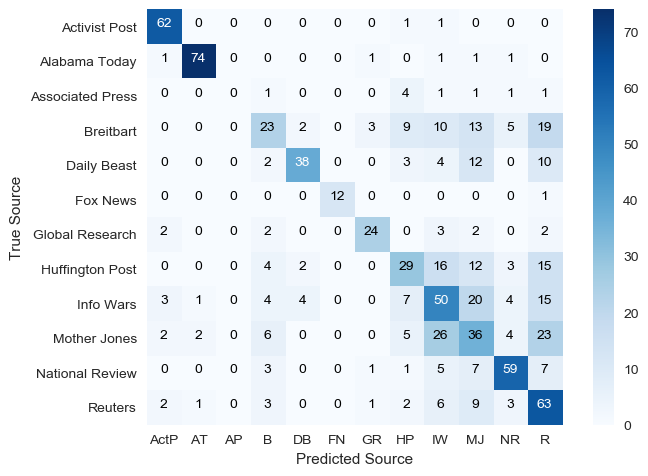

In [50]:
names = ['Activist Post', 'Alabama Today', 'Associated Press', 'Breitbart', 'Daily Beast',
       'Fox News', 'Global Research', 'Huffington Post',
       'Info Wars', 'Mother Jones', 'National Review', 'Reuters']
plt.figure(dpi=100)
cm = confusion_matrix(y_test, dt.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0,1,2,3,4,5,6, 7, 8, 9, 10, 11], ('ActP', 'AT', 'AP', 'B', 'DB',
       'FN', 'GR', 'HP',
       'IW', 'MJ', 'NR', 'R'))
plt.yticks([0,1,2,3,4,5,6, 7, 8, 9, 10, 11], ('Activist Post', 'Alabama Today', 'Associated Press', 'Breitbart', 'Daily Beast',
       'Fox News', 'Global Research', 'Huffington Post',
       'Info Wars', 'Mother Jones', 'National Review', 'Reuters'));
plt.ylabel("True Source")
plt.xlabel("Predicted Source");
fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),#, fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [112]:
dt.predict(125)

array(['Daily Beast'], dtype=object)

In [29]:
pipe = Pipeline(steps=[('tfidf', tfidf), ('lsa', lsa), ('Normalizer', Normalizer(copy=False)), ('km', km), ])
pipe.steps[2]


('Normalizer', Normalizer(copy=False, norm='l2'))

In [46]:
piper = make_pipeline(tfidf, lsa, Normalizer, km)
piper[3]

TypeError: 'Pipeline' object does not support indexing

In [58]:
#_ = Normalizer(copy=False).fit_transform(lsa.fit_transform(tfidf.fit_transform(how_can_this_happen)))
#pipe.fit(how_can_this_happen)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=1,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
 ...0, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [113]:
book = [{'body': """Benghazi, Libya – Lending credence to the theory that ISIS operates as a strategic asset of the Israeli Mossad, Libyan security forces have arrested an ISIS leader in the north-eastern Libyan city of Benghazi – who just so happens to be a Mossad agent.

The man arrested, Ephraim Benjamin, was allegedly an Israeli Mossad agent who began his operation following the 2011 toppling of the Libyan government that resulted in the murder of Libyan President Moammar Ghaddafi, according to the Israeli website Inian Merkazi, which translates to “Central Issues.”

The Mossad agent reportedly held a leading position in ISIS after mingling with Libyans during the fall of Ghaddafi. He then became a prominent imam of a large mosque in Benghazi, Libya’s second largest city, before becoming a ISIS leader who commanded a contingent of upwards of 200 terrorists.

Known in Libya as Abu Hafs, the Mossad agent was arrested and accused by Libyan authorities of gathering intelligence information for the Israeli government.

It is believed that Benjamin, aka Hafs, was a Mossad “Arabist,” which are undercover Israeli spies with Arab features, and who speak fluent Arabic in local dialects, according to the Masr Alarabia website.

The Mossad has a long history of utilizing “Arabists” to infiltrate Palestinian protests and arrest demonstrators as well as assassinating Palestinian anti-occupation activists, according to Masr Alarabia.

Libyan media outlets describe Benjamin as the “Mossad sheikh” who was arrested by local authorities.

Inian Merkazi cited the incident as evidence used by Arab media to justify the argument — popular in much of the Arab world — that Israel is complicit in the rise of ISIS in the region and uses the group as a strategic asset.

Additionally, the fact that ISIS has never so much as attempted an attack within the state of Israel bolsters that line of thinking.

ISIS is popularly believed to have begun official operations within Libya in February of 2015 by beheading 21 Egyptian Coptic Christians in the city of Sirte, but terror operations were believed to have been committed by the terrorist group prior to that date.

Seemingly confirming an Israel-ISIS connection, a 15-page report by U.N. Secretary-General Ban Ki-moon on the work of the U.N. Disengagement Observer Force revealed that the Israeli Defense Forces (IDF) maintained regular contact with the Islamic State since May of 2013.

While initial reports by the IDF claimed they provided medical care for civilians on the Israeli-Syrian border, UN observers confirmed direct contact between ISIS and IDF soldiers – which included, but was not limited to, medical care.

“Throughout the reporting period, UNDOF frequently observed armed members of the opposition interacting with the IDF across the cease-fire line,” according to the report. “On one occasion UNDOF observed the IDF on the Alpha side [inside Israel] handing over two boxes to armed opposition on the Bravo side [inside Syria].”
These activities in concert seem to indicate a coordinated and ongoing support of the Islamic State by Israel. Essentially, the Israelis are utilizing ISIS as a proxy force in an effort to topple the Assad government.

Tellingly, when the U.S. began operations against the Islamic State, the Israeli high command was reluctant to support the move and called the actions of the United States a mistake.

For those not understanding why Israel would support ISIS, it comes down to geopolitical strategy. The Israeli government perceives allies Iran and Syria as direct threats to the Jewish state, as both maintain significant regional military capabilities and political clout.

Israel’s support for ISIS would seem to confirm that they believe in the old adage, “the enemy of my enemy is my friend.”

In this particular circumstance support for the Islamic State equates to Israel eliminating geopolitical rival Syria – under Bashar al-Assad – which would then negate Iranian influence in the region.

It comes down to the simple fact that ISIS is a useful tool for Israel to impose it’s geopolitical will, without having to directly involve themselves in a hot conflict, thus seeming as if they are uninvolved in the conflict.

Once the Syrian government has been toppled, and Iranian influence on the Israeli border largely negated, Israel could then set its sights on the Islamic State – provided they were no longer of use to the Jewish state.

While states such as Israel and the United States often loudly proclaim to be against terrorism, in reality, both governments utilize terrorist groups, such as ISIS and al-Qaeda, to undermine regimes they wish to overthrow or gain influence within.

Please share this article to expose the complicity of states such as Israel and the United States in fomenting Islamic terrorism!
"""}]

In [114]:
book_df = pd.DataFrame.from_dict(book)

In [115]:
cleaned_text = clean_text(book_df.body)

0.0 %


In [116]:
let_do_this = drop_nouns(cleaned_text)

0.0 %


In [117]:
new_clust = pipe.predict(let_do_this)

In [118]:
num = new_clust

In [119]:
num = num.reshape(-1, 1)
predict = dt.predict(num)

In [120]:
print(predict)

['Global Research']


In [121]:
os.system('say "It\'s over......Snake"')

0

In [36]:
true_df.source.unique()

array(['Reuters', 'Breitbart', 'Huffington Post', 'Info wars',
       'Mother Jones', 'National Review', 'Alabama Today',
       'Activist Post', 'Daily Beast', 'Global Research',
       'Associate Press', 'Fox News'], dtype=object)

In [122]:
print("Predictions:")
print("Video Game review of God of War: Reuters")
print("Daily Beast article: Mother Jones")
print("Fox News article: Info Wars")
print("Reuters article: Mother Jones")
print("Info Wars article: Info Wars")
print("Aljazzera article: Mother Jones")
print("New York Post article: Mother Jones")
print("Anti-News article: Global Research")

Predictions:
Video Game review of God of War: Reuters
Daily Beast article: Mother Jones
Fox News article: Info Wars
Reuters article: Mother Jones
Info Wars article: Info Wars
Aljazzera article: Mother Jones
New York Post article: Mother Jones
Anti-News article: Global Research
